# Pandas

In [63]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

#### importe du dataset passager titanic  

In [64]:
data=pd.read_excel('data_set/titanic3.xls')

In [65]:
data.shape

(1309, 14)

#### afficher les colums  et le head  

In [66]:
data.columns
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### suprimer avec drop() 

In [67]:
data = data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)

In [68]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


#  -------------------------------------------------------------------------------

### Analyse 

#  ------------------------------------------------------------------------------

#### utiliser describe()  affiche les statistique de base pour chaque colonne

In [69]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


###### on remarque quon a 1309ligne et age 1046 ligne donc on a des donne manquante dans la colonne age

#### eliminer les donne manquantes  dropna()

In [70]:
data = data.dropna()
data.shape

(1046, 4)

In [71]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


#### parmis c est 1046 passager nombre qui est en 3eme classe 1er 2eme ...ect 

#### utilise la fonction value_counts()

In [72]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

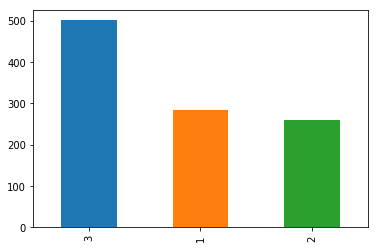

In [73]:
data['pclass'].value_counts().plot.bar()

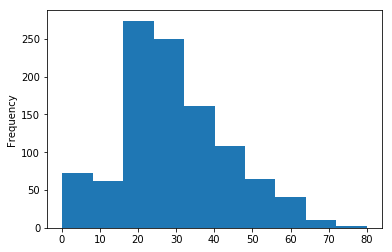

In [74]:
data['age'].plot.hist()

#### regrouper avec groupby() 

In [75]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


# -----------------------------------------------------------------------------------

## L'enver du décor

#### data frame et une serie ;;; une serie est juste une colone dun dataframe elle contien tjr la premier colone dindexing tableu numpy a une dimension ou on ajoute une colonne dindexe  

In [76]:
data['age'].head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

#### on peux choisire notre colone dindexe 

In [77]:
# data = data.set_index('sex')
# data['age'].head()

#### L'indexing 

In [78]:
data['age'][0:10]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

####  le boolean indexing 

In [79]:
# data['age']<18  mask

In [80]:
data[data['age']<18].head() 

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000


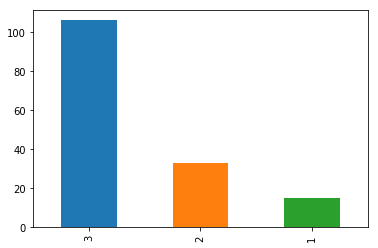

In [81]:
data[data['age']<18]['pclass'].value_counts().plot.bar()

In [82]:
data[data['age']<18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [83]:
data.iloc[0:2,0:2]

,pclass,survived
0,1,1
1,1,1


In [84]:
data.loc[0:3,['age','pclass']]

,age,pclass
0,29.0000,1
1,0.9167,1
2,2.0000,1
3,30.0000,1


# Exo 

In [86]:
data.loc[data['age']<20,'age']=0
data.loc[(data['age']>20)& (data['age']<=30),'age']=1
data.loc[(data['age']>30)& (data['age']<=40),'age']=2
data.loc[data['age']>40,'age']=3
data

,pclass,survived,sex,age
0,1,1,female,1.0
1,1,1,male,0.0
2,1,0,female,0.0
3,1,0,male,1.0
4,1,0,female,1.0
5,1,1,male,3.0
6,1,1,female,3.0
7,1,0,male,2.0
8,1,1,female,3.0
9,1,0,male,3.0


In [ ]:
data_cat0=data[data['age']>=20]
cat1=data_cat0[data_cat0['age']<30]
print(cat1.shape)
cat1.head()

In [ ]:
data_cat1=data[data['age']>=30]
cat2=data_cat1[data_cat1['age']<40]
print(cat2.shape)
cat2.head()

In [ ]:
cat3=data[data['age']>=40]
print(cat3.shape)
cat3.head()